In [82]:
%matplotlib inline

import scipy.stats as sp
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [83]:
def radius(x):
    return np.sqrt(sum([i ** 2 for i in x]))

In [322]:
def visualise(ax, dimension, num_points, generator, title):
    ax.set_title(title)
    ax.scatter(*generator(dimension, n).transpose(), marker = '.', color='midnightblue')       
    ax.set_xlim(-1.1, 1.1)
    ax.set_ylim(-1.1, 1.1)
    if dimension == 3:
        ax.set_zlim(-1.1, 1.1)

# Muller, Marsaglia's method

Let's take $X$ - an n-dimensional vector of normal deviates (it suffices to use $N(0, 1)$).

Radius of $X$ is calculated as $r = \sqrt{ x_1^2 + x_2^2 + \dots + x_n^2}$

$\frac{1}{r}X$ is uniformly distributed over the surface of the unit n-ball ($(n-1)$-sphere)

## *$(n-1)$-sphere*

In [258]:
def generate_Muller(n, count):
    lst = sp.norm.rvs(0, 1, size=(count, n))
    points = np.array([el / radius(el) for el in lst])
    return points

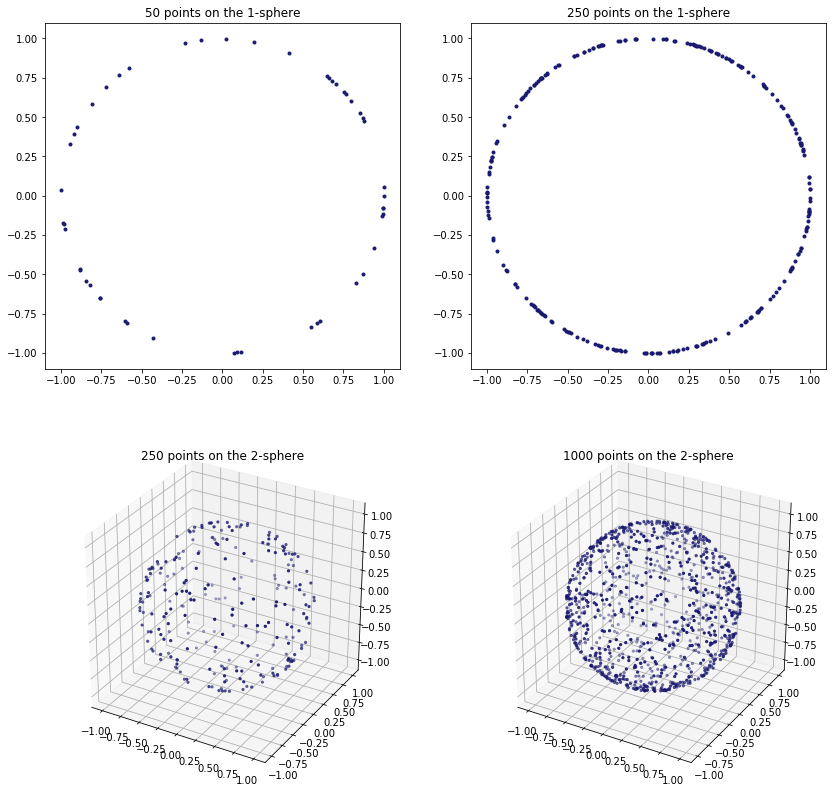

In [259]:
fig = plt.figure(figsize=(14, 14))

for i, n in enumerate([50, 250]):
    visualise(fig.add_subplot(2,2,i+1), 2, n,
              generate_Muller, "{} points on the {}-sphere".format(n, 1))
    
for i, n in enumerate([250, 1000]):
    visualise(fig.add_subplot(2,2,i+3, projection='3d'), 3, n,
              generate_Muller, "{} points on the {}-sphere".format(n, 2))

## *$N$-ball*

If u is a number generated uniformly at random from the interval $\left[0, 1\right]$ and $X$ is a point selected uniformly at random from the unit $(n - 1)$-sphere (e.g. obtained by Marsaglia's algorithm), then $\sqrt[n]{u}X$ is uniformly distributed within the unit n-ball.

In [260]:
def generate_Muller_n_ball(n, count):
    points = generate_Marsaglia(n, count)
    u = np.power(sp.uniform.rvs(0, 1, size=count), 1 / n)
    return np.array([r * p for r, p in zip(u, points)])


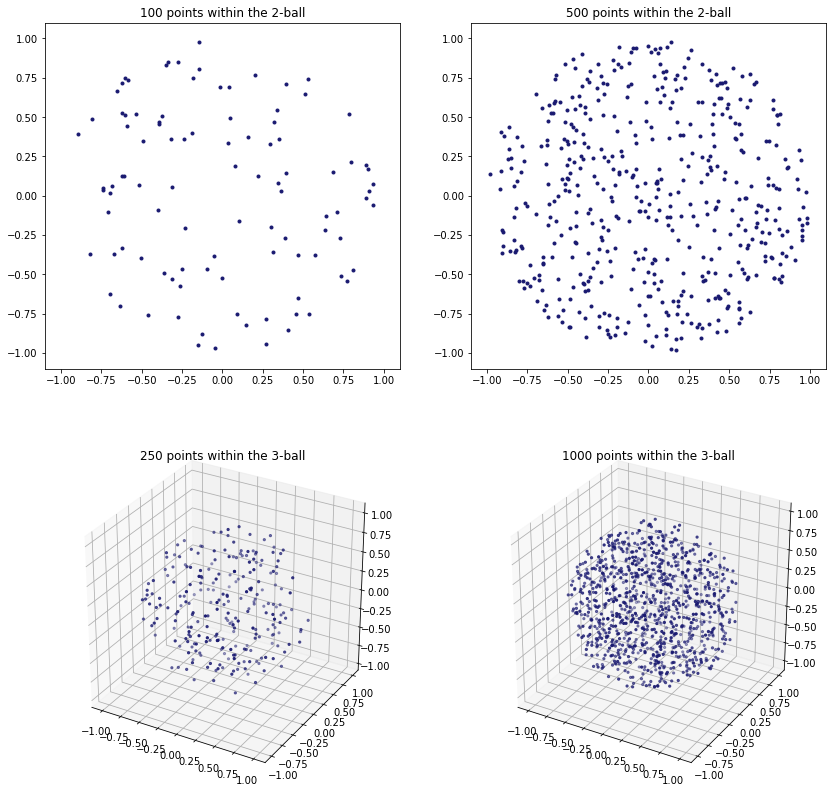

In [261]:
fig = plt.figure(figsize=(14, 14))

for i, n in enumerate([100, 500]):
    visualise(fig.add_subplot(2,2,i+1), 2, n,
              generate_Muller_n_ball, "{} points within the {}-ball".format(n, 2))

for i, n in enumerate([250, 1000]):
    visualise(fig.add_subplot(2,2,i+3, projection='3d'), 3, n,
              generate_Muller_n_ball, "{} points within the {}-ball".format(n, 3))

# Rejection method

## *(N-1)-sphere*

If $X = (x_1, x_2, \dots, x_n)$, where $x_i \simeq U(-1, 1), i=\overline{1, n}$ - a uniformly randomly chosen point in the unit n-cube. The point is rejected and resampled if r > 1 (i.e., if the point is not in the n-ball), otherwise $\frac{1}{r}X$ is uniformly distributed on the unit (n-1)-sphere.

In [294]:
def generate_rejection(n, count):
    points = []
    for i in range(count):
        r = 2
        while r > 1:
            point = sp.uniform.rvs(-1, 2, size=n)
            r = radius(point)
        points.append(point / r)
    
    return np.array(points)

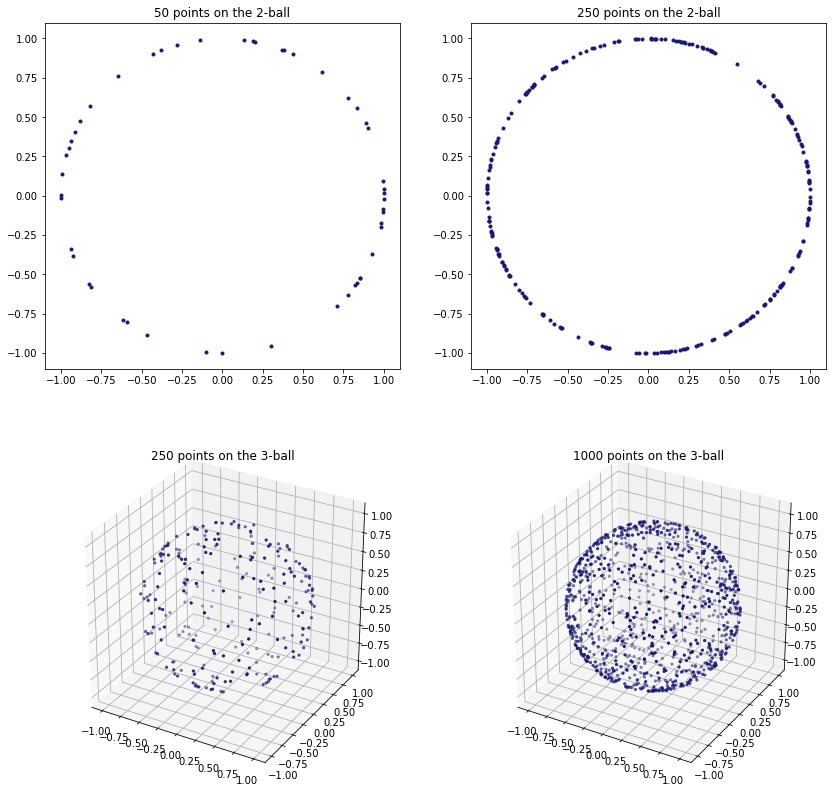

In [296]:
fig = plt.figure(figsize=(14, 14))

for i, n in enumerate([50, 250]):
    visualise(fig.add_subplot(2,2,i+1), 2, n,
              generate_rejection, "{} points on the {}-sphere".format(n, 1))

for i, n in enumerate([250, 1000]):
    visualise(fig.add_subplot(2,2,i+3, projection='3d'), 3, n,
              generate_rejection, "{} points on the {}-sphere".format(n, 2))

## *N-ball*

If $X = (x_1, x_2, \dots, x_n)$, where $x_i \simeq U(-1, 1), i=\overline{1, n}$ - a uniformly randomly chosen point in the unit n-cube. The point is rejected and resampled if r > 1 (i.e., if the point is not in the n-ball), otherwise $X$ is uniformly distributed within the unit n-ball.

In [292]:
def generate_rejection_balls(n, count):
    points = []
    for i in range(count):
        r = 2
        while r > 1:
            point = sp.uniform.rvs(-1, 2, size=n)
            r = radius(point)
        points.append(point)
    
    return np.array(points)

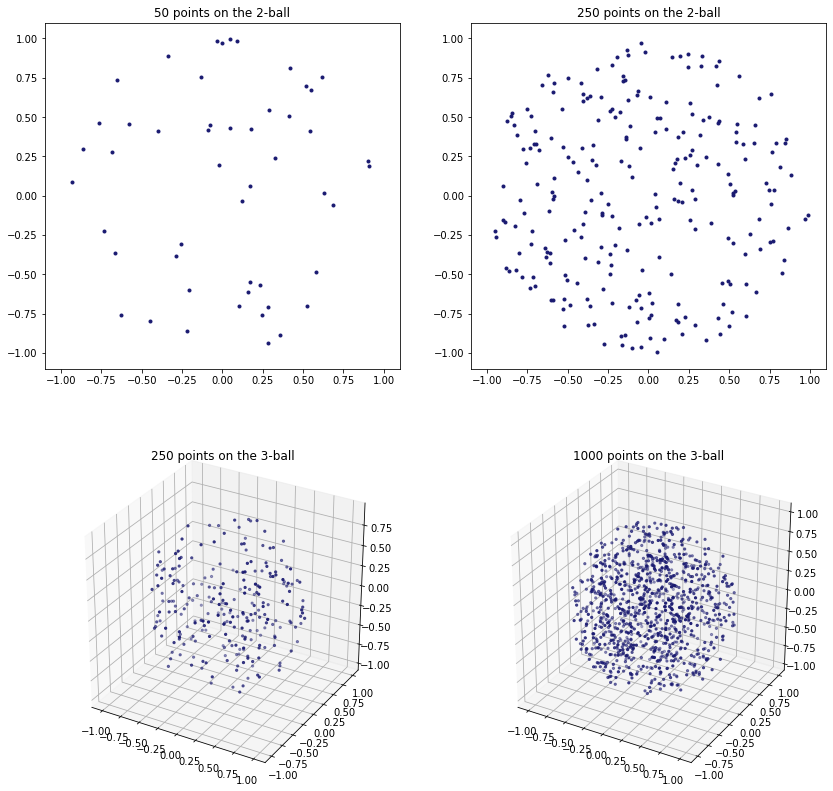

In [293]:
fig = plt.figure(figsize=(14, 14))

for i, n in enumerate([50, 250]):
    visualise(fig.add_subplot(2,2,i+1), 2, n,
              generate_rejection_balls, "{} points on the {}-ball".format(n, 2))

for i, n in enumerate([250, 1000]):
    visualise(fig.add_subplot(2,2,i+3, projection='3d'), 3, n,
              generate_rejection_balls, "{} points on the {}-ball".format(n, 3))

# Exponential distribution (for N-balls)

Let $X = (x_1, x_2, \dots, x_n)$, where $x_i \simeq Norm(0, 1)$ , $i=\overline{1, n} $

If $e \simeq Expon(0.5)$, then $\frac{1}{d}X$ is uniformly distributed in n-sphere, where $d = \sqrt{ e + x_1^2 + x_2^2 + \dots + x_n^2}$


In [279]:
def expon_method(n, count):
    X = sp.norm.rvs(0, 1, size=(count, n))
    e = sp.expon.rvs(0.5, size=count)
    denom = (e + np.sum(X**2, axis=1))**0.5 
    return np.array([x / d for x, d in zip(X, denom)])


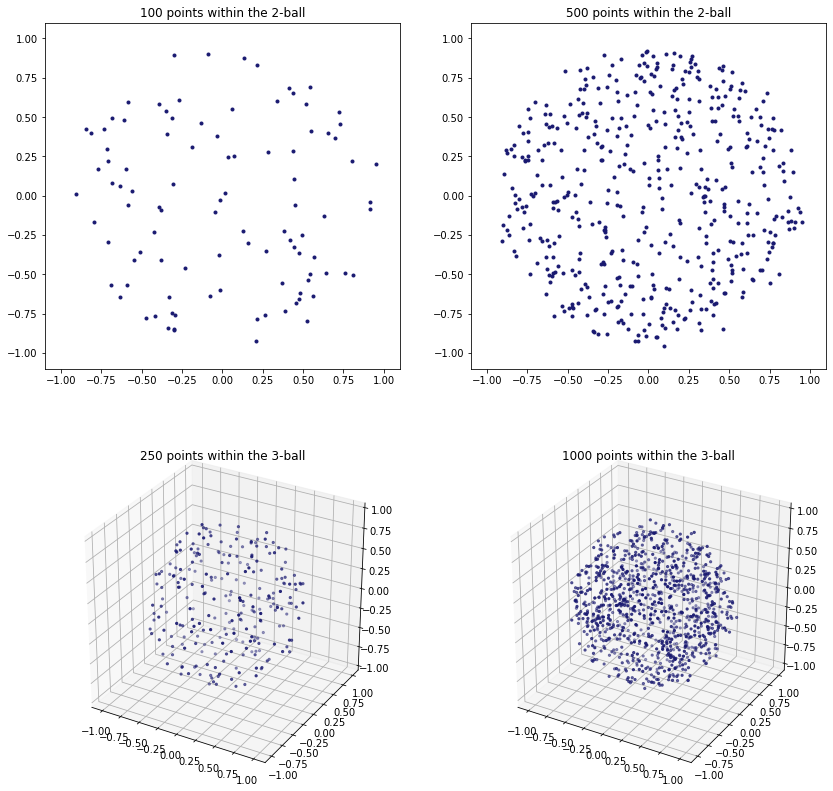

In [297]:
fig = plt.figure(figsize=(14, 14))

for i, n in enumerate([100, 500]):
    visualise(fig.add_subplot(2,2,i+1), 2, n,
              expon_method, "{} points within the {}-ball".format(n, 2))

for i, n in enumerate([250, 1000]):
    visualise(fig.add_subplot(2,2,i+3, projection='3d'), 3, n,
              expon_method, "{} points within the {}-ball".format(n, 3))

# Dropped coordinates (N-balls)

If $X = (x_1, x_2, \dots, x_n, x_{n+1}, x_{n+2})$ - a random vector uniformly distributed on the $(n+1)-sphere$, then $X' = (x_1, x_2, \dots, x_n)$ is s uniformly distributed in the $n-ball$.

In [282]:
def generate_dropped(n, count):
    points = generate_Marsaglia(n+2, count)
    return points[:,:-2]

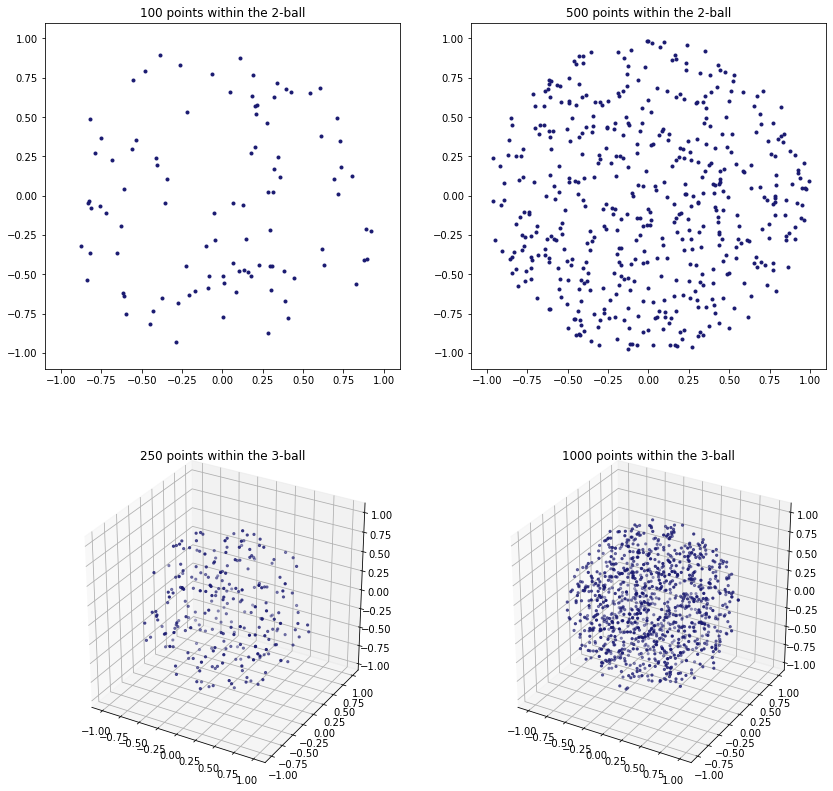

In [298]:
fig = plt.figure(figsize=(14, 14))

for i, n in enumerate([100, 500]):
    visualise(fig.add_subplot(2,2,i+1), 2, n,
              generate_dropped, "{} points within the {}-ball".format(n, 2))

for i, n in enumerate([250, 1000]):
    visualise(fig.add_subplot(2,2,i+3, projection='3d'), 3, n,
              generate_dropped, "{} points within the {}-ball".format(n, 3))

# Polar method

In [345]:
def generate_polar_sphere(n, count):
    if n == 2:
        theta = sp.uniform.rvs(0, 2 * np.pi, size=count)
        return np.array([[np.cos(t), np.sin(t)] for t in theta])
    elif n == 3:
        theta = sp.uniform.rvs(0, 2 * np.pi, size=count)
        phi = np.arccos(sp.uniform.rvs(-1, 2, size=count))
        return np.array([[np.cos(t) * np.sin(p),
                          np.sin(t) * np.sin(p),
                          np.cos(p)] for t, p in zip(theta, phi)])
    

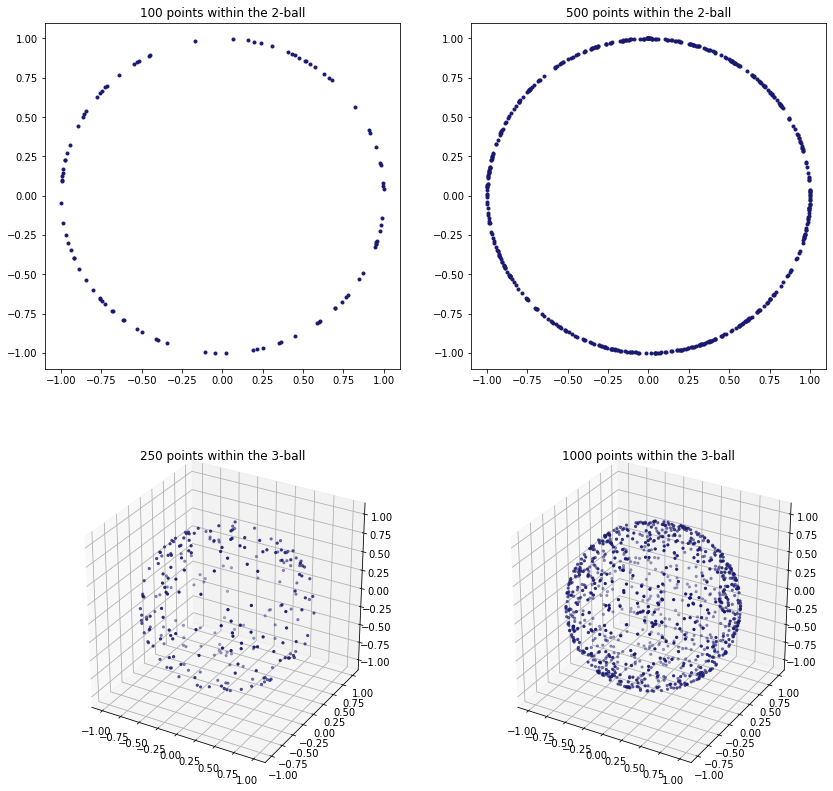

In [347]:
fig = plt.figure(figsize=(14, 14))

for i, n in enumerate([100, 500]):
    visualise(fig.add_subplot(2,2,i+1), 2, n,
              generate_polar_sphere, "{} points within the {}-ball".format(n, 2))

for i, n in enumerate([250, 1000]):
    visualise(fig.add_subplot(2,2,i+3, projection='3d'), 3, n,
              generate_polar_sphere, "{} points within the {}-ball".format(n, 3))

In [354]:
def generate_polar_ball(n, count):
    points = generate_polar_sphere(n, count)
    u = np.power(sp.uniform.rvs(0, 1, size=count), 1 / n)
    return np.array([point * _ for point, _ in zip(points, u)])

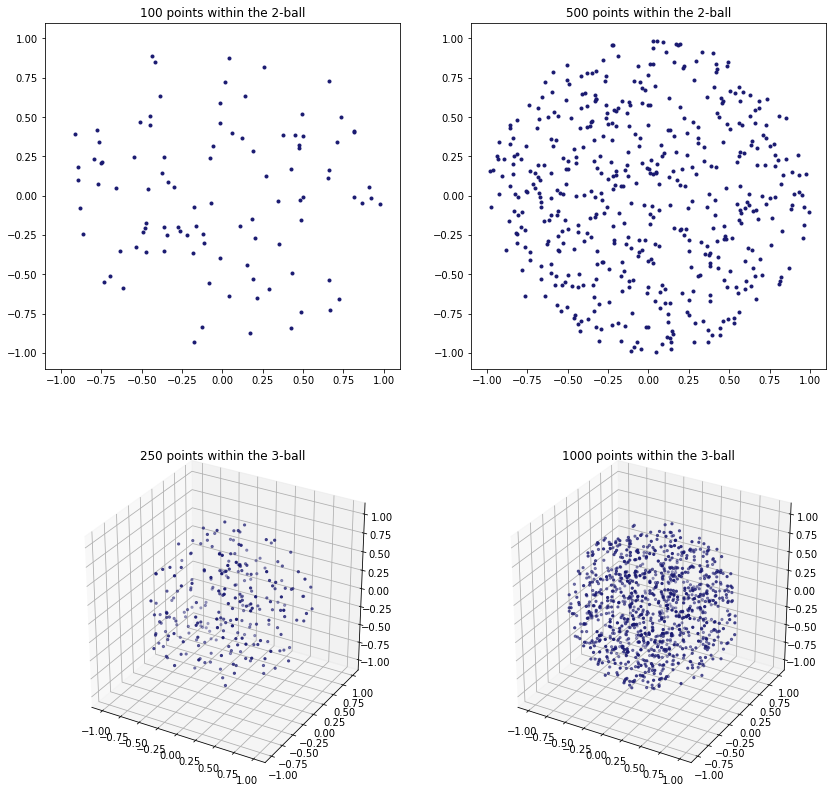

In [356]:
fig = plt.figure(figsize=(14, 14))

for i, n in enumerate([100, 500]):
    visualise(fig.add_subplot(2,2,i+1), 2, n,
              generate_polar_ball, "{} points within the {}-ball".format(n, 2))

for i, n in enumerate([250, 1000]):
    visualise(fig.add_subplot(2,2,i+3, projection='3d'), 3, n,
              generate_polar_ball, "{} points within the {}-ball".format(n, 3))